# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [51]:
import math
import sys

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [53]:
# YOUR CODE HERE

# My Selection: Breast Cancer PMLB
Wine = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"
Wine_DF = pd.read_csv(Wine, sep ="\t", compression="gzip")
Wine_DF.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
83,7.3,0.220,0.30,8.20,0.047,42.0,207.0,0.99660,3.33,0.46,9.5,6
1548,7.1,0.360,0.24,1.80,0.025,32.0,102.0,0.99030,3.34,0.59,12.8,6
4694,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.1,7
838,7.3,0.250,0.36,2.10,0.034,30.0,177.0,0.99085,3.25,0.40,11.9,8
245,6.1,0.180,0.36,2.00,0.038,20.0,249.5,0.99230,3.37,0.79,11.3,6
1289,6.6,0.160,0.30,1.60,0.034,15.0,78.0,0.99200,3.38,0.44,11.2,6
2828,6.4,0.140,0.31,1.20,0.034,53.0,138.0,0.99084,3.38,0.35,11.5,7
3313,7.3,0.145,0.33,1.10,0.042,14.0,64.0,0.99012,3.10,0.37,11.8,7
3605,6.7,0.350,0.48,8.80,0.056,35.0,167.0,0.99628,3.04,0.47,9.4,5
1235,7.8,0.320,0.31,1.70,0.036,46.0,195.0,0.99300,3.03,0.48,10.5,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [54]:
# YOUR CODE HERE

#Column List
print(Wine_DF.columns)

#Descriptions
 #Fixed Acidity: g(tartaric acid)/dm^3: this represents the amount of tartaric acid (in grams) present per cubic decimeter of the given wine
 #Volatile Acidity: g(acetic acid)/dm^3 this represents the amount of acetic acid (in grams) present per cubic decimeter of the given wine
 #Citric Acid (g/dm^3) this represents the amount of Citric acid (in grams) present per cubic decimeter of the given wine
 #Residual Sugar (g/dm^3) this represents the amount of sugar (in grams) present per cubic decimeter of the given wine
 #Chlorides (g(sodium chloride/dm^3)) this represents the amount of Sodium chloride (in grams) present per cubic decimeter of the given wine
 #Free sulfur dioxide (mg/dm^3) this represents the amount of free (unbound) sulfur dioxide (in milligrams) present per cubic decimeter of the given wine
 #Total Sulfur Dioxide (mg/dm^3) this represents the amount of total sulfur dioxide (unbound + bound) (in milligrams) present per cubic decimeter of the given wine
 #pH: Describes the pH value of the wine
 #sulphates: (g(potassium sulphate)/dm^3) This represents the amount (in grams) of potassium sulphate present per cubic decimeter of wine
 #Alcohol: described the %ABV of the wine
 #Target: The output variable, this is a quality score rated on a scale from 0-10



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

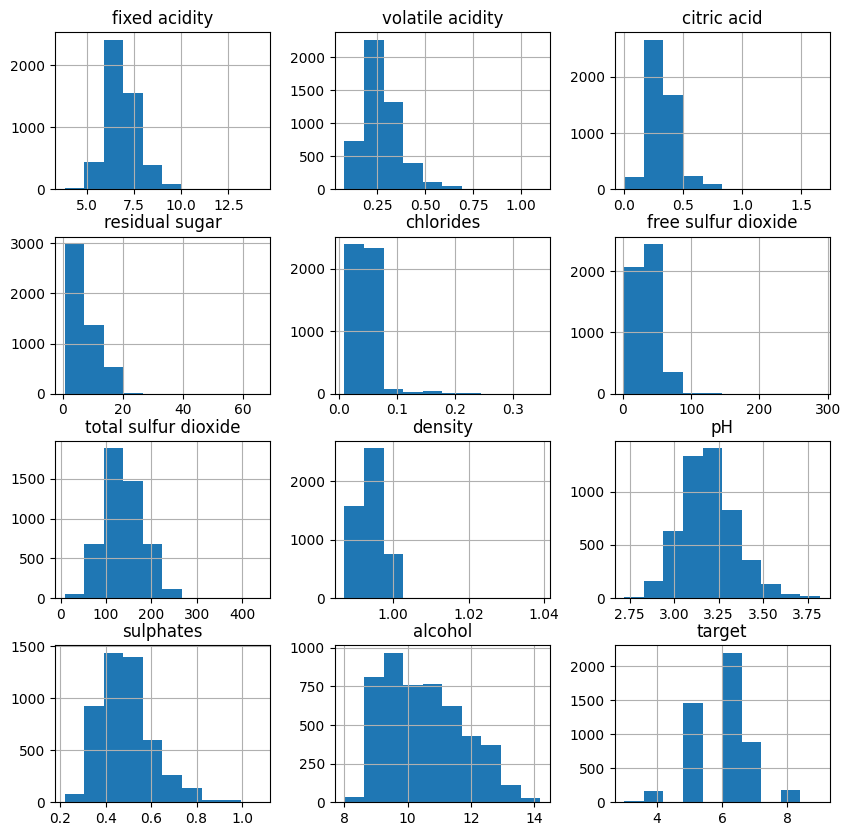

In [55]:
# YOUR CODE HERE
Wine_DF.hist(figsize=(10,10))

#Fixed Acidity: Positive Skew
#Volatile Acidity: Positive Skew
#Citric acid: Positive Skew
#Residual Sugar: Positive Skew
#Chlorides: Positive Skew
#Free Sulfur Dioxide: Positive Skew
#Total Sulfur Dioxide: Positive Skew
#Density: Symetrical Distribution
#pH: Symmetrical Distribution
#Sulphates: Positive Skew (slight)
#Alcohol: Positive Skew (slight)
#Target: Symmetrical Distribution


YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

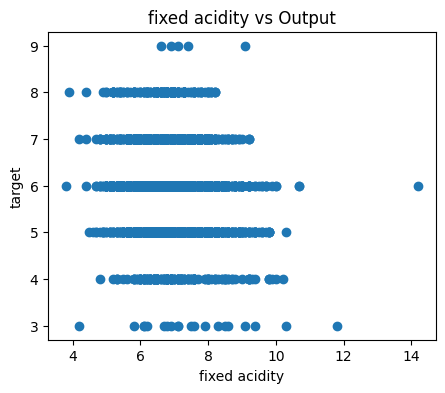

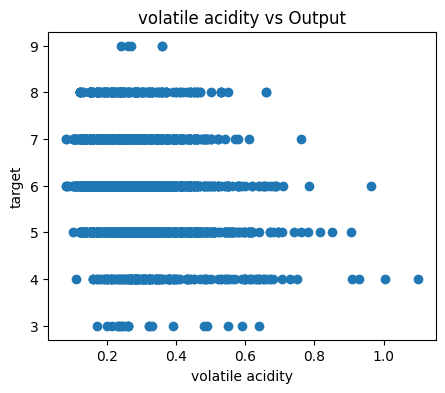

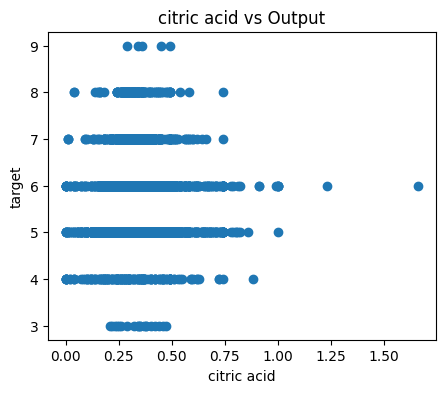

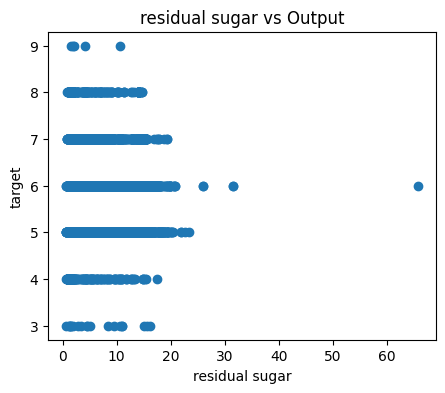

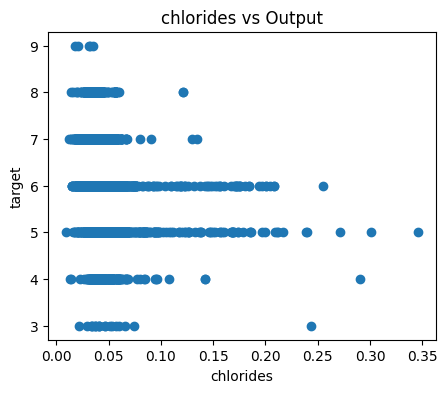

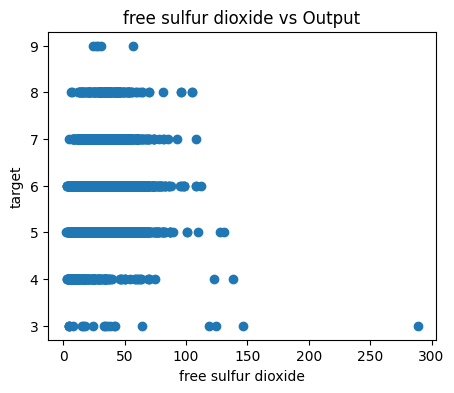

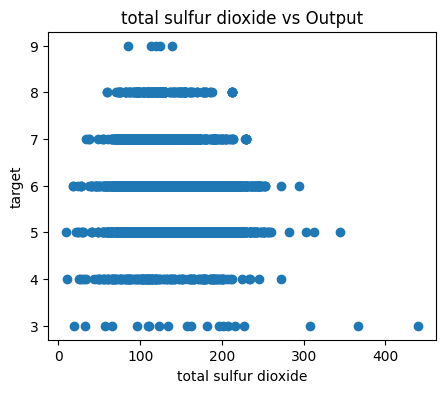

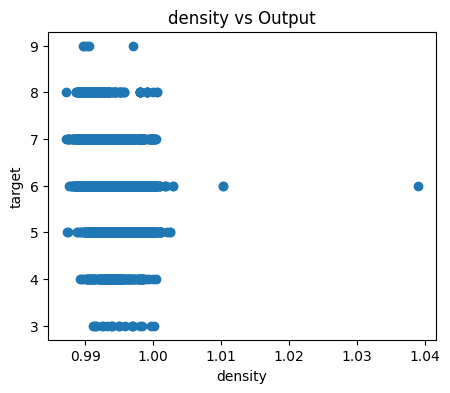

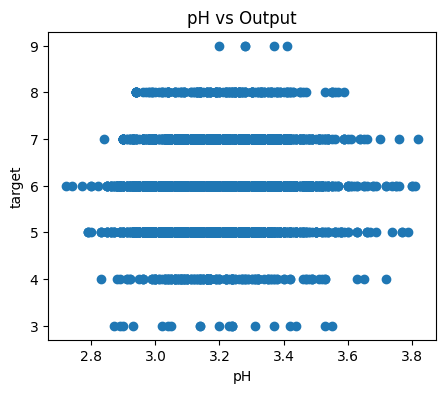

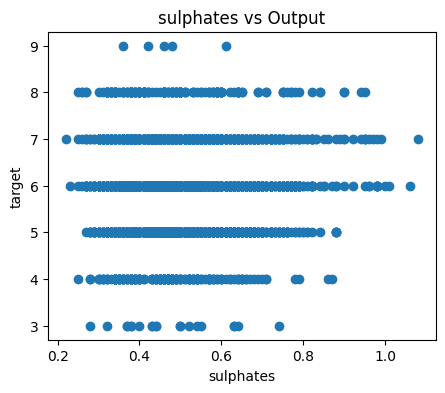

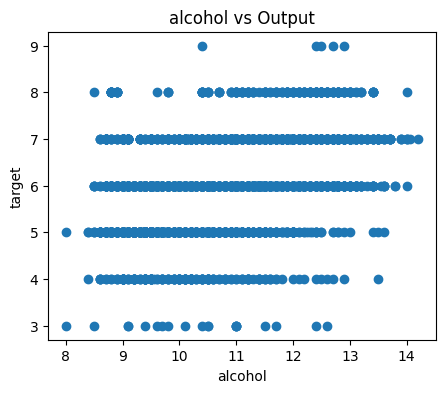

In [56]:
# YOUR CODE HERE
Output = 'target'

for col in Wine_DF.columns:
    if col != Output:
        plt.figure(figsize=(5,4))
        plt.scatter(Wine_DF[col], Wine_DF[Output])
        plt.xlabel(col)
        plt.ylabel(Output)
        plt.title(f'{col} vs Output')
        plt.show()


#Fixed acidity vs. Output: Independent; There does not seem to be a visible trend between wine quality and fixed acidity in this case. 
#Volatile Acidity vs Output: Dependent; The plot shows a slight trend. Volatile acidity values of about 0.4 or less seem to yield higher output values. 
#Citric Acid vs Output: Slightly Dependent; While there doesnt seem to be a clear "upward or downward" trend in these two variables, it does appear that there may be an ideal range of values that yield a higher output/wine quality score somewhere between 0.25 and 0.5, as most of the higher output values (8s and 9s) fall within that range of citric acid content. 
#Residual Sugar vs Output: Independent. There does not seem appear to be any trend here. 
#Chlorides vs Output: Slightly Dependent; There appears to be more wines of a higher score with chlorides less than ~0.075. 
#Free Sulfur Dioxide vs output: Independent; There does not seem to be a visible trend between wine quality and Free Sulfur Dioxide in this case. 
#Total Sulfur Dioxide vs Output: There does not seem to be a visible trend between wine quality and Total Sulfur Dioxide in this case.
#Density vs Output: Independent; There does not seem to be a visible trend between wine quality and Density in this case. 
#pH and Wine Quality: Slightly Dependent; In wines with lower quality scores (4,5,6), there appears to be a wider range of pH, whereas in wines of higher quallity, the pH seems to be more stable (between about 3.0 and 3.6)
#Sulphates vs Output: Independent; There does not seem to be a visible trend between wine quality and Sulphate content in this case. 
#Alcohol vs Output: Dependent; There seems to be a clear trend in alcohol content vs wine quality. The higher the alcohol content, the higher the wine quality score. 




YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

MSE: 0.5631540629886564


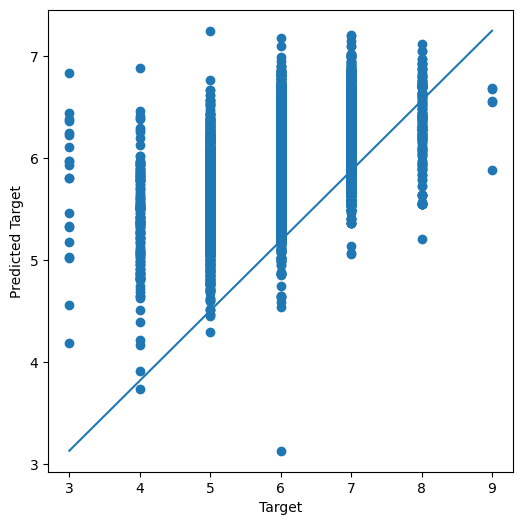

In [57]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = Wine_DF.drop(columns = 'target')
y = Wine_DF['target']

model = LinearRegression()
model.fit(X,y)

pred = model.predict(X)

error = mean_squared_error(y, pred)
print (f"MSE: {error}")

plt.figure(figsize=(6,6))
plt.scatter(y, pred)
plt.plot([y.min(), y.max()], [pred.min(), pred.max()])
plt.xlabel("Target")
plt.ylabel("Predicted Target")
plt.show()




YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [58]:
# YOUR CODE HERE
corr = Wine_DF.corr()['target'].drop('target')
print (corr)

#Best input variable = Alcohol

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: target, dtype: float64


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

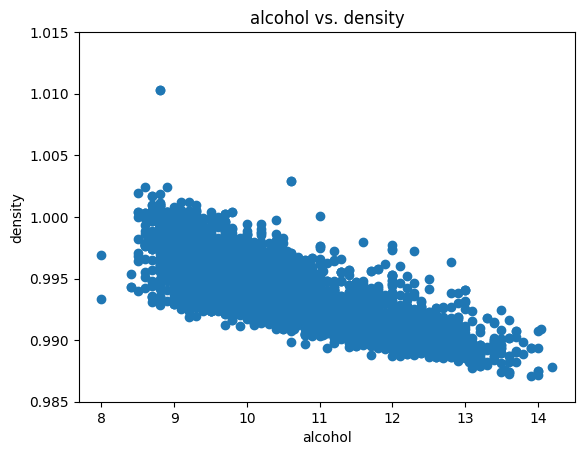

In [59]:
# YOUR CODE HERE
# I know from my background in chemistry that alcohol content and denisty will have dependency since alcohol and water have different densities, 
# different alcohol content will result in different density of the wine

x_col = 'alcohol'
y_col = 'density'

plt.scatter(Wine_DF[x_col], Wine_DF[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.ylim(0.985, 1.015)
plt.title(f'{x_col} vs. {y_col}')
plt.show()

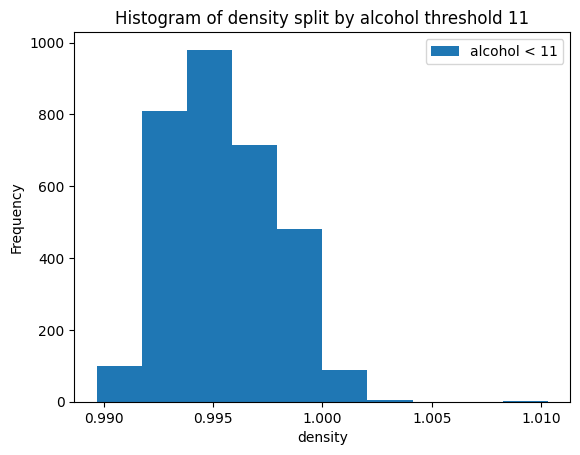

In [60]:
x_col = 'alcohol'
y_col = 'density'

Threshold = 11 #halfway between 8 and 14

First = Wine_DF[Wine_DF[x_col] < Threshold][y_col]
Second = Wine_DF[Wine_DF[x_col] >= Threshold][y_col]

plt.hist(First, label=f'{x_col} < {Threshold}')
plt.xlabel(y_col)
plt.ylabel('Frequency')
plt.title(f'Histogram of {y_col} split by {x_col} threshold {Threshold}')
plt.legend()
plt.show()

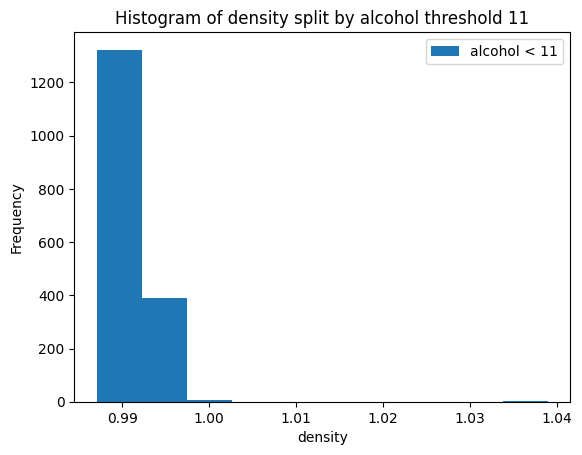

In [61]:
plt.hist(Second, label=f'{x_col} < {Threshold}')
plt.xlabel(y_col)
plt.ylabel('Frequency')
plt.title(f'Histogram of {y_col} split by {x_col} threshold {Threshold}')
plt.legend()
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [62]:
# YOUR CODE HERE
Wine_PCA_Cols = [c for c in Wine_DF.columns if Wine_DF[c].dtype == 'float64']

Wine_pca = PCA()
Wine_pca.fit(Wine_DF[Wine_PCA_Cols].dropna())
Wine_components = pd.DataFrame(Wine_pca.components_, columns=Wine_PCA_Cols)
Wine_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.001544,0.000169,0.000339,0.047328,0.000098,0.261877,0.963858,0.000036,0.000003,0.000341,-0.012504
1,-0.009163,-0.001545,0.000140,0.014943,-0.000072,0.964685,-0.262737,-0.000018,-0.000042,-0.000361,0.006455
2,0.012900,0.000929,0.001258,0.995192,0.000078,-0.026393,-0.042789,0.000447,-0.007017,-0.002142,-0.082723
3,-0.147658,0.015452,-0.005005,0.084200,-0.006573,-0.006381,0.010614,-0.001152,0.017027,0.002601,0.985063
4,0.984965,-0.003978,0.041692,-0.000808,-0.001498,0.007875,-0.001753,0.000328,-0.075506,-0.003538,0.149361
5,0.073410,-0.106675,-0.016610,0.006031,-0.014278,0.000447,-0.000700,0.003634,0.928243,0.347910,-0.004967
6,-0.048670,-0.324715,0.861603,-0.000154,0.012931,-0.000995,0.000034,0.000084,-0.151274,0.356040,0.003943
7,-0.004963,0.162243,-0.352320,-0.000141,0.001499,0.000494,-0.000355,0.000130,-0.312277,0.867179,-0.001941
8,-0.001012,0.925158,0.361918,-0.001710,0.030959,0.001346,-0.000764,0.001263,0.108443,0.012908,-0.014363
9,0.002217,-0.026135,-0.022043,0.000611,0.999300,-0.000007,-0.000029,0.004704,0.012312,-0.001331,0.007043


In [63]:
Wine_pca.explained_variance_
wine_components = len(Wine_pca.explained_variance_)
half = wine_components // 2
half_var = Wine_pca.explained_variance_[:half].sum()
half_var

np.float64(2123.2883328668863)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_pca = Wine_pca.transform(Wine_DF[Wine_PCA_Cols].dropna())

X_pca_half = X_pca[:, :half]

y = Wine_DF.loc[Wine_DF[Wine_PCA_Cols].dropna().index, 'target']

linreg_pca = LinearRegression()
linreg_pca.fit(X_pca_half, y)

y_pred_pca = linreg_pca.predict(X_pca_half)

mse_pca = mean_squared_error(y, y_pred_pca)
mse_pca

0.6121738755415853

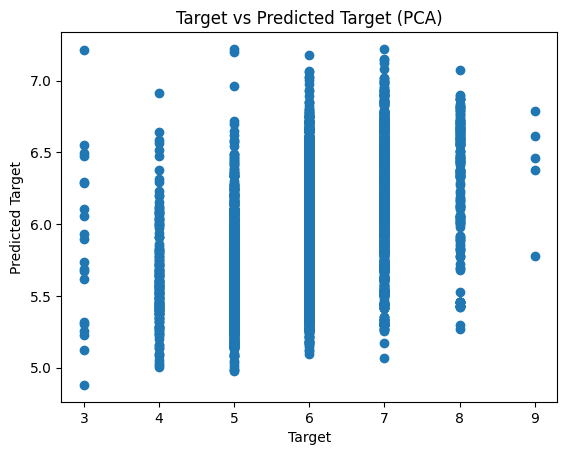

In [65]:
plt.scatter(y, y_pred_pca)
plt.xlabel("Target")
plt.ylabel("Predicted Target")
plt.title("Target vs Predicted Target (PCA)")
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [66]:
# YOUR CODE HERE
corr = Wine_DF[Wine_PCA_Cols].corr()

corr_target = corr.abs().unstack().sort_values(ascending=False)

Highest_Pair = corr_target[corr_target < 1].idxmax()

Highest_Pair

('residual sugar', 'density')

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [67]:
# YOUR CODE HERE
# z-score: How many standard deviations is the datapoint from the mean of the dataset? This is the easiest way i can think to Define an outlier. 
# z-score calculation: Value of the row, mean subtracted, and divided by the standard deviation of the dataset of that feature. I will pick the column that has the largest z-score that causes the row to be an outlier
from scipy.stats import zscore

X = Wine_DF[Wine_PCA_Cols]

Z = X.apply(zscore)

row_zmax = Z.abs().max(axis=1)

outlier_index = row_zmax.idxmax()
outlier_index, row_zmax[outlier_index]

(2781, np.float64(15.031297979691589))

In [68]:
col = Z.abs().idxmax(axis=1)[outlier_index]
col

#We have a datapoint that is ~15 standard deviations away form the average density reported in this dataset in row 2781

'density'

{'whiskers': [<matplotlib.lines.Line2D at 0x7a03673497c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a036734b7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a036734ad80>],
 'medians': [<matplotlib.lines.Line2D at 0x7a03673483e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0367348f80>],
 'means': []}

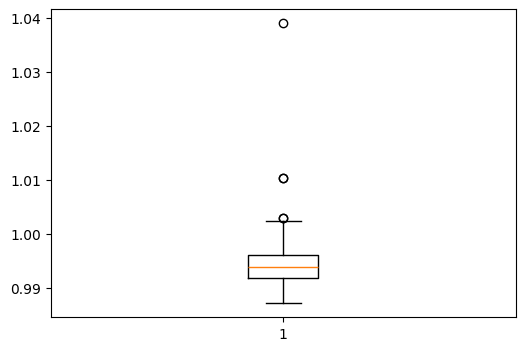

In [69]:
#Visualize
plt.figure(figsize=(6,4))
plt.boxplot(X[col])

#This boxplot shows the OUtlier datapoint compared to the other points in the dataset. The Datapoint appears to be much higher than the rest. 

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE